In [ ]:
# MSDFormer 

In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Update the file path to match the new dataset location
file_path = r"C:\Users\Nawaz Ali\amazonmydata.csv"  # Correct file path
exchange_rate_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Original Data:")
print(exchange_rate_data.head())

# Drop non-numerical columns (e.g., 'date') or columns you don't want to normalize
numerical_data = exchange_rate_data.select_dtypes(include='number')

# Option 1: Normalize data using MinMaxScaler (scales between 0 and 1)
minmax_scaler = MinMaxScaler()
normalized_data_minmax = minmax_scaler.fit_transform(numerical_data)
normalized_data_minmax = pd.DataFrame(normalized_data_minmax, columns=numerical_data.columns)

# Option 2: Normalize data using StandardScaler (scales to mean 0 and standard deviation 1)
standard_scaler = StandardScaler()
normalized_data_standard = standard_scaler.fit_transform(numerical_data)
normalized_data_standard = pd.DataFrame(normalized_data_standard, columns=numerical_data.columns)

# Add the normalized data back to the original DataFrame (optional)
normalized_minmax_df = exchange_rate_data.copy()
normalized_standard_df = exchange_rate_data.copy()

normalized_minmax_df[numerical_data.columns] = normalized_data_minmax
normalized_standard_df[numerical_data.columns] = normalized_data_standard

# Save the normalized data (optional)
save_directory = r"C:\Users\Nawaz Ali"  # Correct path for saving files
normalized_minmax_df.to_csv(f"{save_directory}\\amazonmydata_normalized_minmax.csv", index=False)
normalized_standard_df.to_csv(f"{save_directory}\\amazonmydata_normalized_standard.csv", index=False)

# Display normalized data for MinMaxScaler
print("\nMinMax Normalized Data:")
print(normalized_minmax_df.head())

# Display normalized data for StandardScaler
print("\nStandardScaler Normalized Data:")
print(normalized_standard_df.head())



Original Data:
         Date   Open   High    Low  Close    Volume  Dividends  Stock Splits  \
0  2005-01-03  44.95  45.44  44.21  44.52  10446500          0           0.0   
1  2005-01-04  42.67  43.26  41.50  42.14  19418500          0           0.0   
2  2005-01-05  41.57  42.76  41.56  41.77   8354200          0           0.0   
3  2005-01-06  41.81  42.25  40.90  41.05   8700900          0           0.0   
4  2005-01-07  41.38  42.69  41.16  42.32   9836600          0           0.0   

   Gain  Loss  ...  Usd_Rub_Close  Usd_Try_Close  IRX_Close  JPM_Close  \
0  0.23  0.00  ...          27.71         1.3440      2.204      26.45   
1  0.00  2.38  ...          27.71         1.3510      2.292      26.18   
2  0.00  0.37  ...          27.86         1.3740      2.282      26.24   
3  0.00  0.72  ...          27.77         1.3925      2.267      26.39   
4  1.27  0.00  ...          27.75         1.3940      2.277      26.17   

   BAC_Close  Citigroup_Close  WFC_Close  NASDAQ_Close  SP_

Using device: cuda
         Date   Open   High    Low  Close    Volume  Dividends  Stock Splits  \
0  2005-01-03  44.95  45.44  44.21  44.52  10446500          0           0.0   
1  2005-01-04  42.67  43.26  41.50  42.14  19418500          0           0.0   
2  2005-01-05  41.57  42.76  41.56  41.77   8354200          0           0.0   
3  2005-01-06  41.81  42.25  40.90  41.05   8700900          0           0.0   
4  2005-01-07  41.38  42.69  41.16  42.32   9836600          0           0.0   

   Gain  Loss  ...  Usd_Rub_Close  Usd_Try_Close  IRX_Close  JPM_Close  \
0  0.23  0.00  ...          27.71         1.3440      2.204      26.45   
1  0.00  2.38  ...          27.71         1.3510      2.292      26.18   
2  0.00  0.37  ...          27.86         1.3740      2.282      26.24   
3  0.00  0.72  ...          27.77         1.3925      2.267      26.39   
4  1.27  0.00  ...          27.75         1.3940      2.277      26.17   

   BAC_Close  Citigroup_Close  WFC_Close  NASDAQ_Close 

C:\Users\Nawaz Ali\anaconda3\envs\pytorch_gpu\Lib\site-packages\torch\nn\functional.py:5560: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)


Epoch 1/100, Train MSE Loss: 0.1682, Test MSE Loss: 0.0701, Train MAE Loss: 0.2819, Test MAE Loss: 0.2248
Epoch 2/100, Train MSE Loss: 0.0442, Test MSE Loss: 0.0091, Train MAE Loss: 0.1589, Test MAE Loss: 0.0677
Epoch 3/100, Train MSE Loss: 0.0251, Test MSE Loss: 0.0086, Train MAE Loss: 0.1185, Test MAE Loss: 0.0558
Epoch 4/100, Train MSE Loss: 0.0133, Test MSE Loss: 0.0111, Train MAE Loss: 0.0845, Test MAE Loss: 0.0901
Epoch 5/100, Train MSE Loss: 0.0109, Test MSE Loss: 0.0055, Train MAE Loss: 0.0770, Test MAE Loss: 0.0398
Epoch 6/100, Train MSE Loss: 0.0078, Test MSE Loss: 0.0046, Train MAE Loss: 0.0628, Test MAE Loss: 0.0384
Epoch 7/100, Train MSE Loss: 0.0075, Test MSE Loss: 0.0040, Train MAE Loss: 0.0609, Test MAE Loss: 0.0379
Epoch 8/100, Train MSE Loss: 0.0079, Test MSE Loss: 0.0081, Train MAE Loss: 0.0640, Test MAE Loss: 0.0594
Epoch 9/100, Train MSE Loss: 0.0116, Test MSE Loss: 0.0036, Train MAE Loss: 0.0744, Test MAE Loss: 0.0383
Epoch 10/100, Train MSE Loss: 0.0077, Test MSE

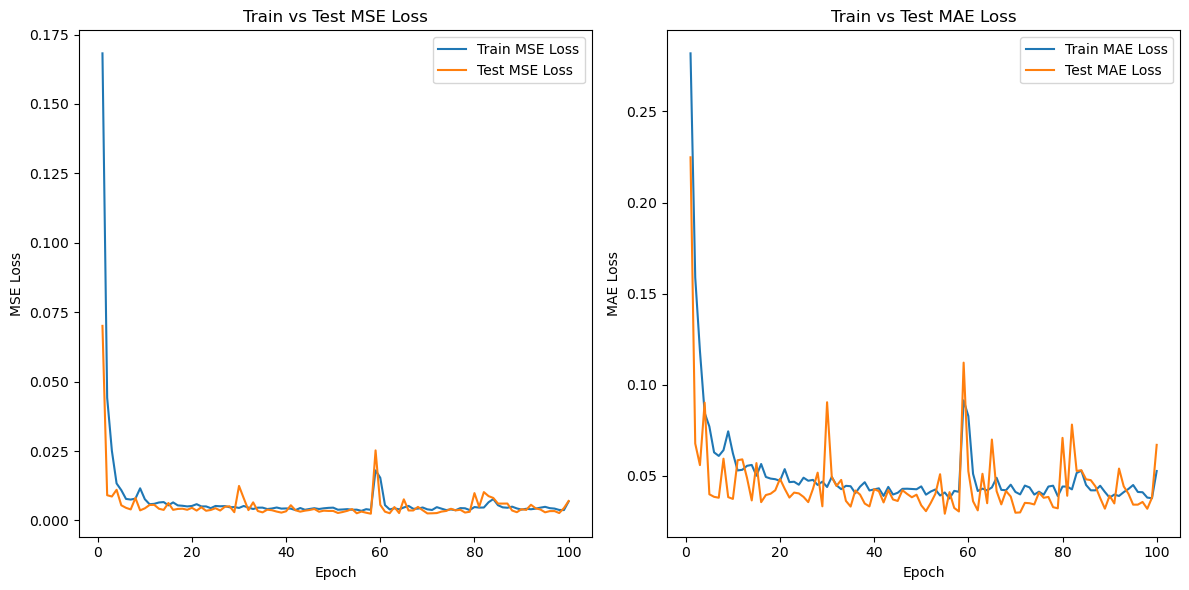

IntegratedModelWithAttention(
  (attention): SelfLearningAttention(
    (query): Linear(in_features=6, out_features=128, bias=True)
    (key): Linear(in_features=6, out_features=128, bias=True)
    (value): Linear(in_features=6, out_features=128, bias=True)
    (attention_score): Softmax(dim=-1)
  )
  (embedding): Linear(in_features=128, out_features=128, bias=True)
  (positional_encoding): Identity()
  (transformer): Transformer(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-3): 4 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
          )
          (linear1): Linear(in_features=128, out_features=128, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=128, out_features=128, bias=True)
          (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm(

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset, random_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Check if GPU is available and select the appropriate device (use CUDA for GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load the normalized data (assuming file paths are correct)
file_path = r"C:\Users\Nawaz Ali\amazonmydata.csv"  # Correct file path
data = pd.read_csv(file_path)

# Display the first few rows of the data to confirm it's loaded correctly
print(data.head())

# Define the Dataset with Normalization and Multi-Scale Slice-Based Statistics
class IntegratedDatasetWithNormalization(Dataset):
    def __init__(self, data, input_cols, target_col, sequence_length, normalization_type='minmax'):
        self.data = data
        self.input_cols = input_cols
        self.target_col = target_col
        self.sequence_length = sequence_length
        self.normalization_type = normalization_type
        
        # Normalize the target column
        if normalization_type == 'minmax':
            self.target_scaler = MinMaxScaler()
            self.data[target_col] = self.target_scaler.fit_transform(self.data[[target_col]])
        elif normalization_type == 'standard':
            self.target_scaler = StandardScaler()
            self.data[target_col] = self.target_scaler.fit_transform(self.data[[target_col]])

    def __len__(self):
        return len(self.data) - self.sequence_length

    def __getitem__(self, idx):
        # Get the main sequence slice (Min-Max Scaled)
        x = self.data[self.input_cols].iloc[idx:idx + self.sequence_length].values
        y = self.data[self.target_col].iloc[idx + self.sequence_length]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

# Prepare the dataset with normalization and adaptive ensemble
input_cols = ['RSI', 'SMA', 'EMA', 'MACD', 'Bollinger_Upper', 'Bollinger_Lower']  # Example features
target_col = 'Close'  # Target variable (the column you want to predict)
sequence_length = 10  # Sequence length (adjust if needed)
scales = [2, 5, 10]  # Multi-scale factors

dataset = IntegratedDatasetWithNormalization(data, input_cols, target_col, sequence_length, normalization_type='minmax')

# Split the dataset into 80% training and 20% testing
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the Self-Learning Attention Mechanism
class SelfLearningAttention(nn.Module):
    def __init__(self, input_dim, attention_dim):
        super(SelfLearningAttention, self).__init__()
        self.query = nn.Linear(input_dim, attention_dim)
        self.key = nn.Linear(input_dim, attention_dim)
        self.value = nn.Linear(input_dim, attention_dim)
        self.attention_score = nn.Softmax(dim=-1)

    def forward(self, x):
        # Ensure input shape is (batch_size, seq_len, input_dim)
        Q = self.query(x)  # Query vector
        K = self.key(x)    # Key vector
        V = self.value(x)  # Value vector
        attention_weights = self.attention_score(torch.bmm(Q, K.transpose(1, 2)))  # Calculate attention
        attended = torch.bmm(attention_weights, V)  # Apply attention weights
        return attended

# Define the Transformer Model with Self-Learning Attention
class IntegratedModelWithAttention(nn.Module):
    def __init__(self, input_dim, embed_dim, num_heads, ff_dim, num_layers, output_dim, attention_dim):
        super(IntegratedModelWithAttention, self).__init__()
        self.input_dim = input_dim  # Fixed input dimension based on the number of input features
        self.embed_dim = embed_dim
        self.attention_dim = attention_dim
        self.attention = SelfLearningAttention(self.input_dim, attention_dim)
        self.embedding = nn.Linear(attention_dim, self.embed_dim)  # Embedding layer
        self.positional_encoding = nn.Identity()  # Simplified positional encoding
        self.transformer = nn.Transformer(
            d_model=self.embed_dim,
            nhead=num_heads,
            num_encoder_layers=num_layers,
            dim_feedforward=ff_dim,
            batch_first=True
        )
        self.fc = nn.Linear(self.embed_dim, output_dim)

    def forward(self, x):
        # Ensure x has the shape (batch_size, seq_len, input_dim)
        x = x.view(-1, x.size(1), self.input_dim)  # Reshape the input to (batch_size, seq_len, input_dim)
        
        # Now apply the attention mechanism
        x = self.attention(x)  # Apply self-learning attention
        
        # Apply the embedding layer
        x = self.embedding(x)
        
        # Add positional encoding (simplified)
        x = self.positional_encoding(x)
        
        # Pass through transformer encoder
        x = self.transformer(x, x)  # Transformer encoder
        
        # Use the output from the last time step for prediction
        x = x[:, -1, :]
        
        # Final fully connected layer
        x = self.fc(x)
        return x

# Model hyperparameters
input_dim = len(input_cols)  # Number of features in the input data
embed_dim = 128
num_heads = 4
ff_dim = 128
num_layers = 4
output_dim = 1  # Output dimension (prediction)
attention_dim = 128
dropout = 0.1
seq_len = 10  # Sequence length (this should match the sequence length used in your data)

# Initialize the model and move to GPU
model = IntegratedModelWithAttention(input_dim, embed_dim, num_heads, ff_dim, num_layers, output_dim, attention_dim).to(device)
criterion_mse = nn.MSELoss()
criterion_mae = nn.L1Loss()

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop with dual-level optimization
epochs = 100
train_mse_losses = []
test_mse_losses = []
train_mae_losses = []
test_mae_losses = []

for epoch in range(epochs):
    model.train()
    epoch_train_mse_loss = 0
    epoch_train_mae_loss = 0
    for x_batch, y_batch in train_dataloader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)  # Move data to GPU
        optimizer.zero_grad()
        output = model(x_batch)
        
        # MSE and MAE loss computation for training
        mse_loss = criterion_mse(output.squeeze(), y_batch)
        mae_loss = criterion_mae(output.squeeze(), y_batch)
        
        # Compute denoise loss (based on output vs target)
        denoise_loss = torch.mean((output.squeeze() - y_batch) ** 2)
        
        # Total loss
        total_loss = mse_loss + 0.1 * denoise_loss
        total_loss.backward()
        optimizer.step()
        
        # Update training losses
        epoch_train_mse_loss += mse_loss.item()
        epoch_train_mae_loss += mae_loss.item()

    # Evaluation on test data
    model.eval()
    epoch_test_mse_loss = 0
    epoch_test_mae_loss = 0
    with torch.no_grad():
        for x_batch, y_batch in test_dataloader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            output = model(x_batch)
            
            # MSE and MAE loss computation for testing
            mse_loss = criterion_mse(output.squeeze(), y_batch)
            mae_loss = criterion_mae(output.squeeze(), y_batch)
            
            epoch_test_mse_loss += mse_loss.item()
            epoch_test_mae_loss += mae_loss.item()

    # Store losses
    train_mse_losses.append(epoch_train_mse_loss / len(train_dataloader))
    test_mse_losses.append(epoch_test_mse_loss / len(test_dataloader))
    train_mae_losses.append(epoch_train_mae_loss / len(train_dataloader))
    test_mae_losses.append(epoch_test_mae_loss / len(test_dataloader))

    print(f"Epoch {epoch+1}/{epochs}, Train MSE Loss: {train_mse_losses[-1]:.4f}, Test MSE Loss: {test_mse_losses[-1]:.4f}, Train MAE Loss: {train_mae_losses[-1]:.4f}, Test MAE Loss: {test_mae_losses[-1]:.4f}")

# Visualize the training and test losses
plt.figure(figsize=(12, 6))

# Plot MSE loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_mse_losses, label='Train MSE Loss')
plt.plot(range(1, epochs + 1), test_mse_losses, label='Test MSE Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Train vs Test MSE Loss')
plt.legend()

# Plot MAE loss
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_mae_losses, label='Train MAE Loss')
plt.plot(range(1, epochs + 1), test_mae_losses, label='Test MAE Loss')
plt.xlabel('Epoch')
plt.ylabel('MAE Loss')
plt.title('Train vs Test MAE Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

# Optionally, set model to evaluation mode after training to disable dropout and other training-specific features
model.eval()


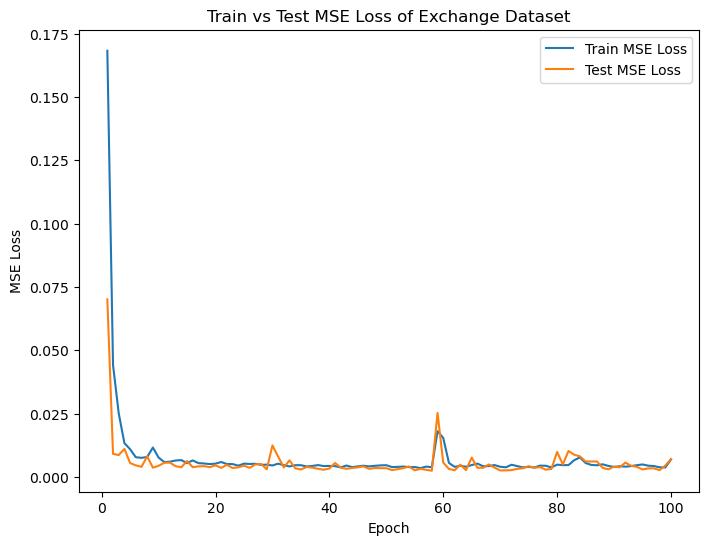

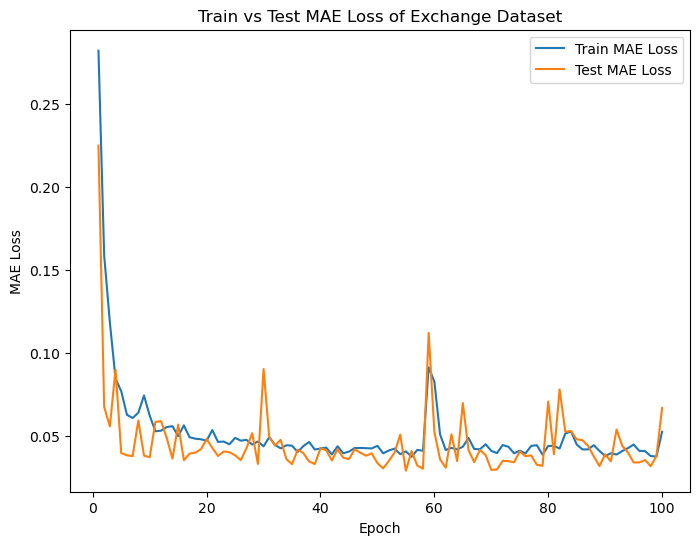

In [2]:
import matplotlib.pyplot as plt

# Visualize the Train vs Test MSE Loss in a separate chart
plt.figure(figsize=(8, 6))

plt.plot(range(1, epochs + 1), train_mse_losses, label='Train MSE Loss')
plt.plot(range(1, epochs + 1), test_mse_losses, label='Test MSE Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Train vs Test MSE Loss of Exchange Dataset')
plt.legend()

# Save the plot
save_path_mse = r'D:\Friends Working\Attaullah\Thesis Dataset Training\training_Amizon_MSE.png'
plt.savefig(save_path_mse, dpi=600)
# Show the plot
plt.show()

# Visualize the Train vs Test MAE Loss in a separate chart
plt.figure(figsize=(8, 6))

plt.plot(range(1, epochs + 1), train_mae_losses, label='Train MAE Loss')
plt.plot(range(1, epochs + 1), test_mae_losses, label='Test MAE Loss')
plt.xlabel('Epoch')
plt.ylabel('MAE Loss')
plt.title('Train vs Test MAE Loss of Exchange Dataset')
plt.legend()

# Save the plot
save_path_mae = r'D:\Friends Working\Attaullah\Thesis Dataset Training\training_Amizon_MAE.png'
plt.savefig(save_path_mae, dpi=600)
# Show the plot
plt.show()


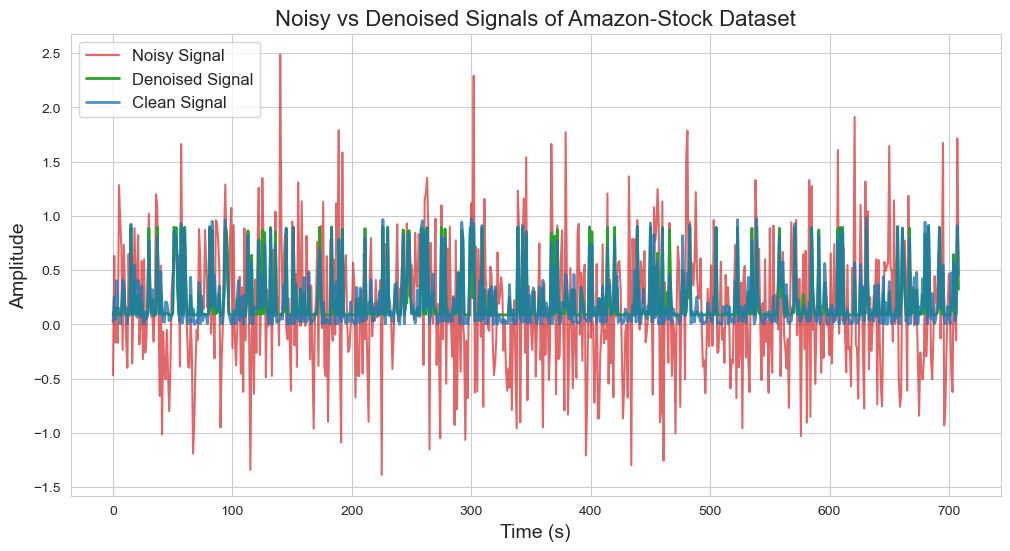

Signal-to-Noise Ratio (SNR) - Original: -3.9931, Denoised: 11.9980
Mean Squared Error (MSE) - Denoised: 0.0071
Peak Signal-to-Noise Ratio (PSNR) - Denoised: 21.3277
Structural Similarity Index (SSIM) - Denoised: 0.8156


In [13]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from torch.utils.data import DataLoader

# Assuming you have the trained model and test dataset ready
# You can replace this with your test dataset and model
model.eval()  # Set the model to evaluation mode

# Get predictions on the test set (use the test_dataloader from your code)
all_predictions = []
all_labels = []
with torch.no_grad():
    for x_batch, y_batch in test_dataloader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        output = model(x_batch)
        
        # Collect the predictions and true values
        all_predictions.append(output.cpu().numpy())
        all_labels.append(y_batch.cpu().numpy())

# Convert the predictions and true values to numpy arrays
all_predictions = np.concatenate(all_predictions, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

# Denoised signal (processed_signal) = model's predictions
denoised_signal = all_predictions.flatten()  # Flatten the array to match the time series structure
clean_signal = all_labels.flatten()  # Flatten the array to match the time series structure

# Assuming that the noisy signal is the original data (from the test set)
noisy_signal = clean_signal + 0.5 * np.random.normal(size=len(clean_signal))  # Example noisy signal

# 1. Signal-to-Noise Ratio (SNR)
def calculate_snr(signal, noise):
    signal_power = np.mean(signal ** 2)
    noise_power = np.mean(noise ** 2)
    if noise_power == 0:
        return float('inf')  # Infinite SNR if no noise
    return 10 * np.log10(signal_power / noise_power)

original_noise = noisy_signal - clean_signal
denoised_noise = denoised_signal - clean_signal

snr_original = calculate_snr(clean_signal, original_noise)
snr_denoised = calculate_snr(clean_signal, denoised_noise)

# 2. Mean Squared Error (MSE)
def calculate_mse(signal1, signal2):
    return np.mean((signal1 - signal2) ** 2)

mse_denoised = calculate_mse(clean_signal, denoised_signal)

# 3. Peak Signal-to-Noise Ratio (PSNR)
def calculate_psnr(signal1, signal2):
    mse = calculate_mse(signal1, signal2)
    if mse == 0:
        return float('inf')  # Infinite PSNR if no error
    max_signal = np.max(signal1)
    return 10 * np.log10(max_signal ** 2 / mse)

psnr_denoised = calculate_psnr(clean_signal, denoised_signal)

# 4. Structural Similarity Index (SSIM)
ssim_denoised = ssim(clean_signal, denoised_signal, data_range=clean_signal.max() - clean_signal.min())

# 5. Visual Inspection (Plot comparison of signals)
plt.figure(figsize=(12, 6))

# Use distinct colors and line styles
# Use distinct colors and line styles
plt.plot(np.arange(len(noisy_signal)), noisy_signal, label='Noisy Signal', color='tab:red', linestyle='-', alpha=0.7, linewidth=1.5)
plt.plot(np.arange(len(denoised_signal)), denoised_signal, label='Denoised Signal', color='tab:green', linestyle='-', linewidth=2)
plt.plot(np.arange(len(clean_signal)), clean_signal, label='Clean Signal', color='tab:blue', linestyle='-', alpha=0.8, linewidth=2)


# Customize title and labels
plt.title('Noisy vs Denoised Signals of Amazon-Stock Dataset', fontsize=16)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Amplitude', fontsize=14)

# Add a legend
plt.legend(fontsize=12)

# Add a grid for better visualization
plt.grid(True)
# Define the path for saving the denoised signals plot
save_path_denoised = r'D:\Friends Working\Attaullah\Thesis Dataset Training\denoised_signals_plot.png'

# Save the plot as a PNG file with high resolution
plt.savefig(save_path_denoised, dpi=600)

# Show the plot
plt.show()

# Output the evaluation metrics
print(f"Signal-to-Noise Ratio (SNR) - Original: {snr_original:.4f}, Denoised: {snr_denoised:.4f}")
print(f"Mean Squared Error (MSE) - Denoised: {mse_denoised:.4f}")
print(f"Peak Signal-to-Noise Ratio (PSNR) - Denoised: {psnr_denoised:.4f}")
print(f"Structural Similarity Index (SSIM) - Denoised: {ssim_denoised:.4f}")


Using device: cuda


C:\Users\Nawaz Ali\anaconda3\envs\pytorch_gpu\Lib\site-packages\torch\nn\functional.py:5560: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)


Epoch 1/50, Seq Length 96, MSE Loss: 0.0776, MAE Loss: 0.1802
Epoch 1/50, Seq Length 192, MSE Loss: 0.0081, MAE Loss: 0.0703
Epoch 1/50, Seq Length 336, MSE Loss: 0.0048, MAE Loss: 0.0532
Epoch 1/50, Seq Length 720, MSE Loss: 0.0041, MAE Loss: 0.0486
Epoch 2/50, Seq Length 96, MSE Loss: 0.0031, MAE Loss: 0.0425
Epoch 2/50, Seq Length 192, MSE Loss: 0.0027, MAE Loss: 0.0390
Epoch 2/50, Seq Length 336, MSE Loss: 0.0026, MAE Loss: 0.0381
Epoch 2/50, Seq Length 720, MSE Loss: 0.0025, MAE Loss: 0.0380
Epoch 3/50, Seq Length 96, MSE Loss: 0.0023, MAE Loss: 0.0348
Epoch 3/50, Seq Length 192, MSE Loss: 0.0019, MAE Loss: 0.0317
Epoch 3/50, Seq Length 336, MSE Loss: 0.0020, MAE Loss: 0.0329
Epoch 3/50, Seq Length 720, MSE Loss: 0.0019, MAE Loss: 0.0317
Epoch 4/50, Seq Length 96, MSE Loss: 0.0018, MAE Loss: 0.0301
Epoch 4/50, Seq Length 192, MSE Loss: 0.0018, MAE Loss: 0.0299
Epoch 4/50, Seq Length 336, MSE Loss: 0.0019, MAE Loss: 0.0314
Epoch 4/50, Seq Length 720, MSE Loss: 0.0021, MAE Loss: 0.0

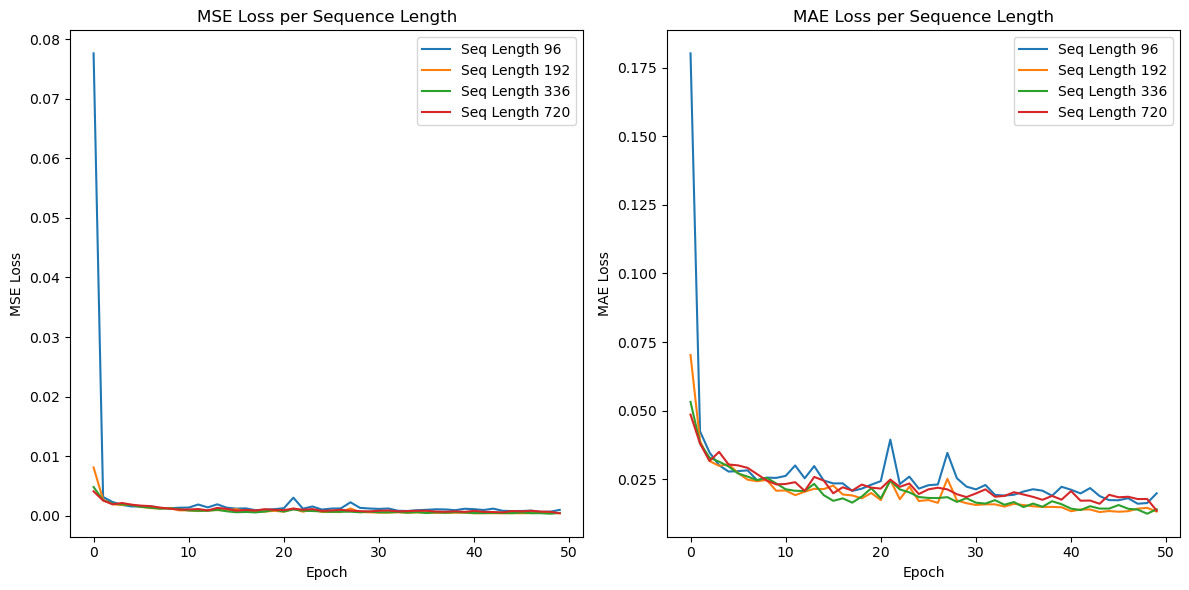

IntegratedModelWithAttention(
  (attention): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
  )
  (embedding): Linear(in_features=6, out_features=64, bias=True)
  (transformer): Transformer(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
          )
          (linear1): Linear(in_features=64, out_features=128, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=128, out_features=64, bias=True)
          (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
      (norm): Layer

In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Check if GPU is available and select the appropriate device (use CUDA for GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load the normalized data (both MinMax and StandardScaler data can be loaded)
file_path = r"C:/Users/Nawaz Ali/amazonmydata_normalized_minmax.csv"
data = pd.read_csv(file_path)

# Define the Dataset with Normalization and Multi-Scale Slice-Based Statistics
class IntegratedDatasetWithNormalization(Dataset):
    def __init__(self, data, input_cols, target_col, sequence_length, normalization_type='minmax'):
        """
        Args:
            normalization_type: 'minmax' for MinMaxScaler and 'standard' for StandardScaler
        """
        self.data = data
        self.input_cols = input_cols
        self.target_col = target_col
        self.sequence_length = sequence_length
        self.normalization_type = normalization_type
        
        # Normalize the target column
        if normalization_type == 'minmax':
            self.target_scaler = MinMaxScaler()
            self.data[target_col] = self.target_scaler.fit_transform(self.data[[target_col]])
        elif normalization_type == 'standard':
            self.target_scaler = StandardScaler()
            self.data[target_col] = self.target_scaler.fit_transform(self.data[[target_col]])

    def __len__(self):
        return len(self.data) - self.sequence_length

    def __getitem__(self, idx):
        x = self.data[self.input_cols].iloc[idx:idx + self.sequence_length].values
        y = self.data[self.target_col].iloc[idx + self.sequence_length]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

# Sequence lengths to train
sequence_lengths = [96, 192, 336, 720]
input_cols = ['RSI', 'SMA', 'EMA', 'MACD', 'Bollinger_Upper', 'Bollinger_Lower']  # Example features
target_col = 'Close'  # Target variable (the column you want to predict)

# Define a dictionary of dataloaders for each sequence length
dataloaders = {}
for seq_len in sequence_lengths:
    dataset = IntegratedDatasetWithNormalization(data, input_cols, target_col, seq_len, normalization_type='minmax')  # Change to 'standard' if needed
    dataloaders[seq_len] = DataLoader(dataset, batch_size=32, shuffle=True, pin_memory=True)  # pin_memory=True for faster GPU transfer

# Define the Transformer Model with Self-Learning Attention
class IntegratedModelWithAttention(nn.Module):
    def __init__(self, input_dim, embed_dim, num_heads, ff_dim, num_layers, output_dim, attention_dim):
        super(IntegratedModelWithAttention, self).__init__()
        self.attention = nn.MultiheadAttention(embed_dim, num_heads, batch_first=True)
        self.embedding = nn.Linear(input_dim, embed_dim)
        self.transformer = nn.Transformer(
            d_model=embed_dim,
            nhead=num_heads,
            num_encoder_layers=num_layers,
            dim_feedforward=ff_dim,
            batch_first=True
        )
        self.fc = nn.Linear(embed_dim, output_dim)

    def forward(self, x):
        x = self.embedding(x)  # Linear embedding
        x, _ = self.attention(x, x, x)  # Apply attention
        x = self.transformer(x, x)  # Transformer encoder
        x = x[:, -1, :]  # Use the output from the last time step
        x = self.fc(x)  # Final fully connected layer
        return x

# Model hyperparameters
input_dim = len(input_cols)  # Number of features in the input data
embed_dim = 64
num_heads = 4
ff_dim = 128
num_layers = 3
output_dim = 1
attention_dim = 128

# Initialize the model and move to GPU
model = IntegratedModelWithAttention(input_dim, embed_dim, num_heads, ff_dim, num_layers, output_dim, attention_dim).to(device)

# Loss and optimizer
criterion_mse = nn.MSELoss()
criterion_mae = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop with dual-level optimization
epochs = 50
mse_losses = {seq_len: [] for seq_len in sequence_lengths}
mae_losses = {seq_len: [] for seq_len in sequence_lengths}

for epoch in range(epochs):
    model.train()

    for seq_len in sequence_lengths:
        epoch_mse_loss = 0
        epoch_mae_loss = 0
        dataloader = dataloaders[seq_len]

        for x_batch, y_batch in dataloader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)  # Move data to GPU
            optimizer.zero_grad()
            output = model(x_batch)
            mse_loss = criterion_mse(output.squeeze(), y_batch)
            mae_loss = criterion_mae(output.squeeze(), y_batch)
            mse_loss.backward()
            optimizer.step()

            epoch_mse_loss += mse_loss.item()
            epoch_mae_loss += mae_loss.item()

        mse_losses[seq_len].append(epoch_mse_loss / len(dataloader))
        mae_losses[seq_len].append(epoch_mae_loss / len(dataloader))

        print(f"Epoch {epoch+1}/{epochs}, Seq Length {seq_len}, MSE Loss: {mse_losses[seq_len][-1]:.4f}, MAE Loss: {mae_losses[seq_len][-1]:.4f}")

# Plotting the MSE and MAE Losses
plt.figure(figsize=(12, 6))

# Plot MSE Losses
plt.subplot(1, 2, 1)
for seq_len in sequence_lengths:
    plt.plot(range(epochs), mse_losses[seq_len], label=f'Seq Length {seq_len}')
plt.title('MSE Loss per Sequence Length')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()

# Plot MAE Losses
plt.subplot(1, 2, 2)
for seq_len in sequence_lengths:
    plt.plot(range(epochs), mae_losses[seq_len], label=f'Seq Length {seq_len}')
plt.title('MAE Loss per Sequence Length')
plt.xlabel('Epoch')
plt.ylabel('MAE Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

# Optionally, set model to evaluation mode after training to disable dropout and other training-specific features
model.eval()
